### Este notebook contém os comandos para estruturar as respostas das perguntas.
* Importando as bibliotecas

In [0]:
# !!! ATENÇÃO !!!
# Caso seja necessário instalar a biblioteca 'num2words'
#%pip install num2words

In [0]:
# !!! ATENÇÃO !!!
# Caso instale alguma biblioteca, será necessário reiniciar o kernel
#dbutils.library.restartPython()

In [0]:
# Importando as bibliotecas

from pyspark.sql.functions import col
import matplotlib.pyplot as plt

from num2words import num2words

1. Quais os cinco munícipios com o maior valor total pago pelo BPC?

NM_MUN,NM_UF,bpc_val
Porto Velho,Rondônia,344950310.39
Boa Vista,Roraima,306640941.63
Rio Branco,Acre,305025148.03
Foz do Iguaçu,Paraná,187313260.75
Pelotas,Rio Grande do Sul,187255028.10


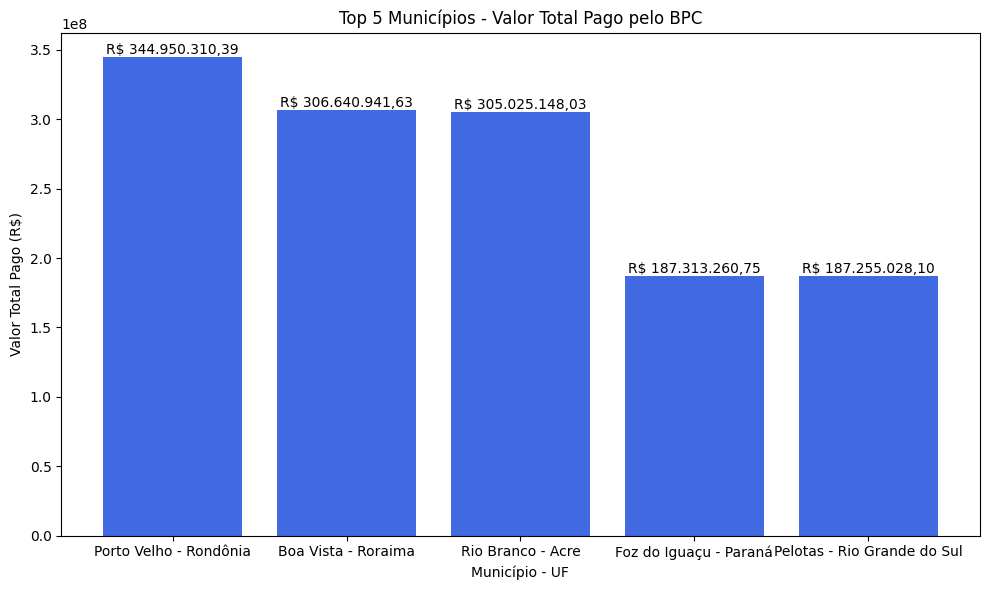

In [0]:
# Quais os cinco munícipios com o maior valor total pago pelo BPC?

# Seleciona os cinco municípios com maior valor total pago
top5_df = (
    spark.table("bpc.gold.total_pago_por_municipio")
    .orderBy(col("bpc_val").desc())
    .limit(5)
    .select("NM_MUN", "NM_UF", "bpc_val")
)

# Coleta os dados para o gráfico
top5_pd = top5_df.toPandas()
top5_pd["bpc_val_fmt"] = top5_pd["bpc_val"].apply(lambda x: f"R$ {x:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."))

# Cria o gráfico de barras
plt.figure(figsize=(10,6))
bars = plt.bar(top5_pd["NM_MUN"] + " - " + top5_pd["NM_UF"], top5_pd["bpc_val"], color="royalblue")
plt.title("Top 5 Municípios - Valor Total Pago pelo BPC")
plt.ylabel("Valor Total Pago (R$)")
plt.xlabel("Município - UF")

# Adiciona os valores formatados nas barras
for bar, label in zip(bars, top5_pd["bpc_val_fmt"]):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), label, ha='center', va='bottom', fontsize=10)

plt.tight_layout()
display(top5_df)
plt.show()

2. Quais as cinco unidades da federação com o maior valor total pago pelo BPC?

NM_UF,bpc_val
Rio Grande do Sul,1495154813.64
Paraná,1085480771.83
Mato Grosso do Sul,792413757.76
Rondônia,575420140.27
Acre,543450549.71


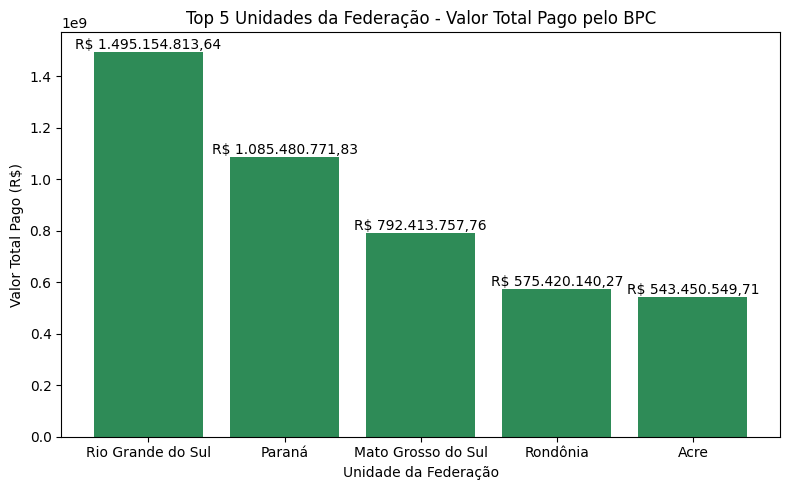

In [0]:
# 2. Quais as cinco unidades da federação com o maior valor total pago pelo BPC?

# Seleciona as cinco unidades da federação com maior valor total pago
top5_uf_df = (
    spark.table("bpc.gold.total_pago_por_unidade_federacao")
    .orderBy(col("bpc_val").desc())
    .limit(5)
    .select("NM_UF", "bpc_val")
)

# Coleta os dados para o gráfico
top5_uf_pd = top5_uf_df.toPandas()
top5_uf_pd["bpc_val_fmt"] = top5_uf_pd["bpc_val"].apply(lambda x: f"R$ {x:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."))

# Cria o gráfico de barras
plt.figure(figsize=(8,5))
bars = plt.bar(top5_uf_pd["NM_UF"], top5_uf_pd["bpc_val"], color="seagreen")
plt.title("Top 5 Unidades da Federação - Valor Total Pago pelo BPC")
plt.ylabel("Valor Total Pago (R$)")
plt.xlabel("Unidade da Federação")

# Adiciona os valores formatados nas barras
for bar, label in zip(bars, top5_uf_pd["bpc_val_fmt"]):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), label, ha='center', va='bottom', fontsize=10)

plt.tight_layout()
display(top5_uf_df)
plt.show()

3. Qual o valor total pago por região do Brasil pelo BPC?

NM_REGIAO,bpc_val
Sul,2782006691.32
Norte,1887875291.16
Centro-oeste,1052505472.74


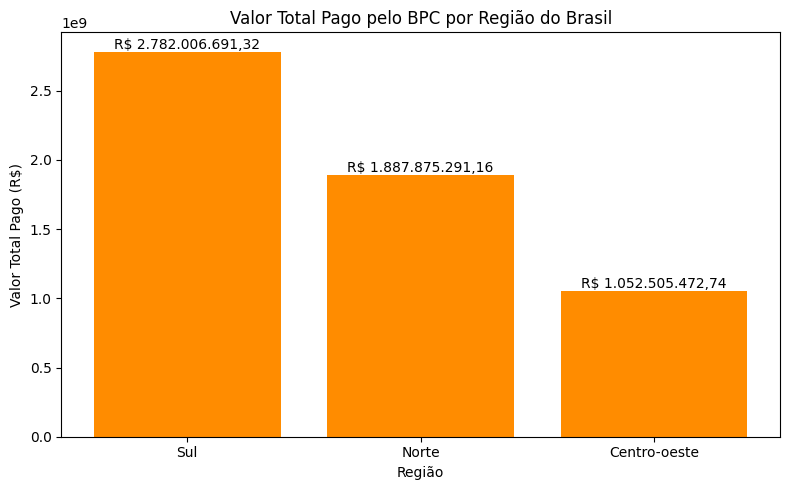

In [0]:
# 3. Qual o valor total pago por região do Brasil pelo BPC?

# Seleciona o valor total pago por região
regiao_df = (
    spark.table("bpc.gold.total_pago_por_regiao")
    .select("NM_REGIAO", "bpc_val")
    .orderBy(col("bpc_val").desc())
)

# Coleta os dados para o gráfico
regiao_pd = regiao_df.toPandas()
regiao_pd["bpc_val_fmt"] = regiao_pd["bpc_val"].apply(lambda x: f"R$ {x:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."))

# Cria o gráfico de barras
plt.figure(figsize=(8,5))
bars = plt.bar(regiao_pd["NM_REGIAO"], regiao_pd["bpc_val"], color="darkorange")
plt.title("Valor Total Pago pelo BPC por Região do Brasil")
plt.ylabel("Valor Total Pago (R$)")
plt.xlabel("Região")

# Adiciona os valores formatados nas barras
for bar, label in zip(bars, regiao_pd["bpc_val_fmt"]):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), label, ha='center', va='bottom', fontsize=10)

plt.tight_layout()
display(regiao_df)
plt.show()

4. Qual o valor total pago pelo BPC?

In [0]:
# 4. Qual o valor total pago pelo BPC?

# Soma o valor total pago pelo BPC em todas as regiões
total_pago = spark.table("bpc.gold.total_pago_por_regiao").groupBy().sum("bpc_val").collect()[0][0]

# Formata o valor para moeda brasileira
total_pago_fmt = f"R$ {total_pago:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")

# Valor por extenso em português do Brasil
total_pago_extenso = num2words(total_pago, lang="pt_BR", to="currency")

print(f"Valor total pago pelo BPC: {total_pago_fmt}")
print(f"Por extenso: {total_pago_extenso}")

Valor total pago pelo BPC: R$ 5.722.387.455,22
Por extenso: cinco bilhões, setecentos e vinte e dois milhões, trezentos e oitenta e sete mil, quatrocentos e cinquenta e cinco reais e vinte e dois centavos


5. Há algum município que não realizou pagamento mensal pelo BPC?

In [0]:
# 5. Há algum município que não ocorreu pagamento mensal pelo BPC?

# Junta as tabelas de municípios, unidades federativas e pagamentos
mun_sem_pag_df = (
    spark.table("bpc.silver.municipios_ibge")
    .join(
        spark.table("bpc.silver.unidade_federacao"),
        col("bpc.silver.municipios_ibge.CD_UF") == col("bpc.silver.unidade_federacao.CD_UF"),
        "left"
    )
    .join(
        spark.table("bpc.silver.municipios_pagador"),
        col("bpc.silver.municipios_ibge.CD_MUN") == col("bpc.silver.municipios_pagador.Cod_Mun"),
        "left"
    )
    .filter(col("bpc.silver.municipios_pagador.Data_Pag").isNull())
    .select(
        col("bpc.silver.unidade_federacao.NM_UF"),
        col("bpc.silver.municipios_ibge.NM_MUN"),
        col("bpc.silver.municipios_pagador.Data_Pag")
    )
)

display(mun_sem_pag_df)

NM_UF,NM_MUN,Data_Pag


* Todos os **Municípios da Faixa de Fronteira e Cidades Gêmeas** realizaram pagamento pelo BPC.

6. Todas as perguntas foram respondidas.